# Importing Libraries

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load The Dataset

In [152]:
dataset=pd.read_csv("/Users/princegupta/Documents/ML_PROJECTS/Loan_Prediction/loan_approval_dataset.csv")

# Exploring Dataset

In [154]:
dataset.head(5)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

getting the overwiew of the dataset by reviewing top 5 rows

In [156]:
dataset.shape

(4269, 13)

checking no. of rows and columns 

In [158]:
dataset.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

Statistical Analysis
numeriical feature laon_id : indicates that there are 1 to 4269 applicants no_of_dependents:indicates that applicants have are 0 to maximum 5 dependents income_annum : indicates income of applicants are 200000 to maximum 9900000 laon_amount: indicating that the amount of loan requested by the applicants is minimum 300000 to maximum 39500000 75% of bank_asset values are below 7100000

In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


dataset has both numeric and catagorical data

In [162]:
dataset.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

catagorical feature :eduaction, self_emplyed and laon_status each has 2 unique values respectively [Graduate,Not],[No,Yes],[Approved,Rejected]

# checking for null values

In [165]:
dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

no null values in the dataset

In [167]:
dataset.duplicated().sum()

0

there are no duplicates in the dataset

In [169]:
dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Removing unecessary spaces in Columns name and Column values , since it can produce unecessary errors in future

In [171]:
dataset.columns=dataset.columns.str.strip()
dataset.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# Outliers Minning

# Detecting Outlier by Visualization

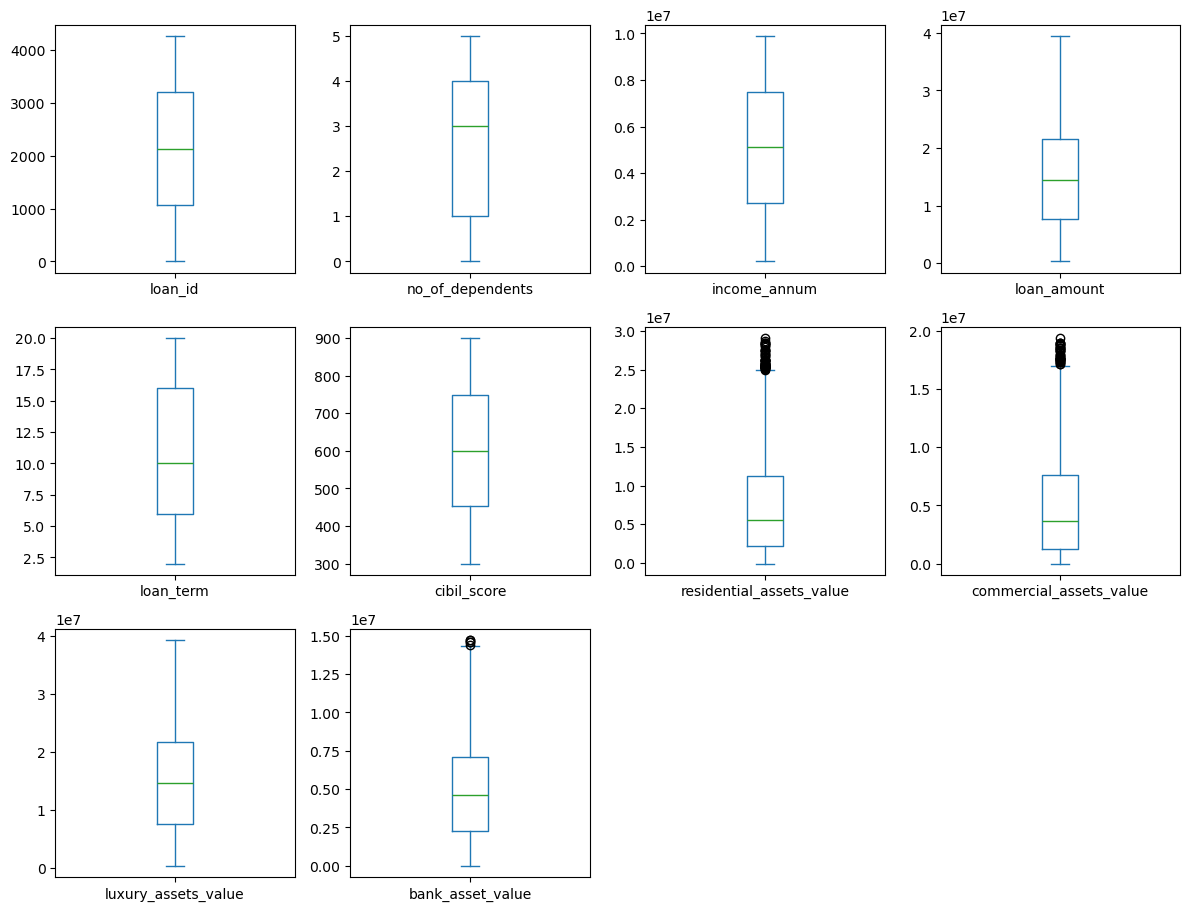

In [174]:
dataset.plot(kind='box', figsize= (12,12), layout=(4,4), sharex= False, subplots= True) ;plt.tight_layout()

Outliers detected in features bank_asset_value :indicating there are few applicants having more than 1400000 in their bank accounts residentoal_assets_value and commercial_assets_value : indicating there are few applicants having more value of residential and commercial assets

# Visualizing Outliers For residential_assets_value 

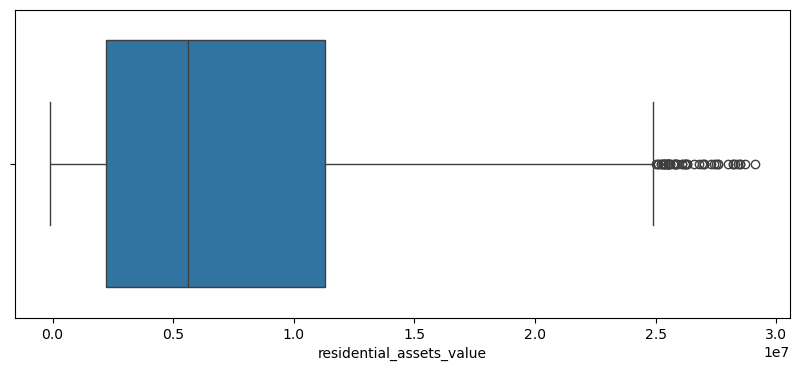

In [177]:
plt.figure(figsize=(10,4))
sns.boxplot(x='residential_assets_value', data=dataset)
plt.show()

# Visualizing Outliers For commercial_assets_value

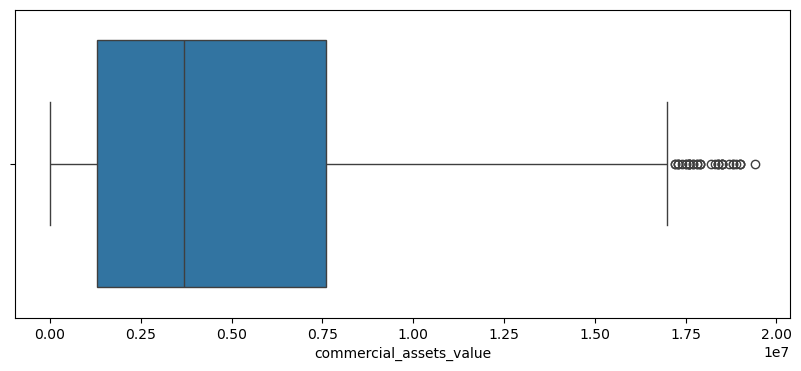

In [179]:
plt.figure(figsize=(10,4))
sns.boxplot(x='commercial_assets_value', data=dataset)
plt.show()

# Removing Outliers

In [181]:
q1=dataset["residential_assets_value"].quantile(0.25)
q3=dataset["residential_assets_value"].quantile(0.75)

Calculating q1 and q3

In [183]:
IQR=q3-q1

calculating IQR

In [185]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(-11450000.0, 24950000.0)

min_range and max_range

In [187]:
dataset=dataset[dataset["residential_assets_value"]<max_range]

defining max_range to remove the outliers

# visualizing residential_assets_value after removing outlier 

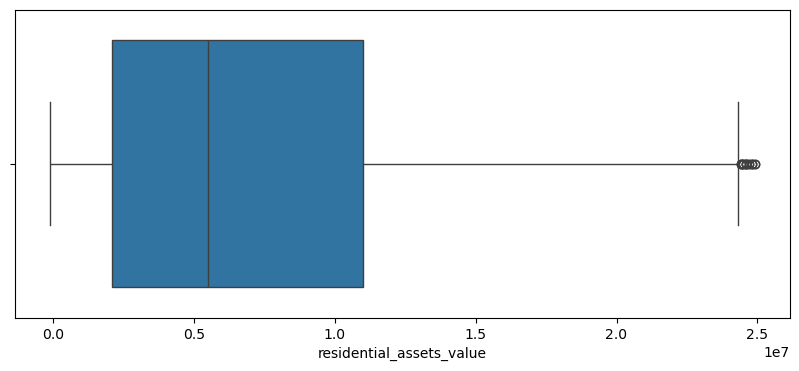

In [190]:
plt.figure(figsize=(10,4))
sns.boxplot(x='residential_assets_value', data=dataset)
plt.show()

In [191]:
q_1=dataset["commercial_assets_value"].quantile(0.25)
q_3=dataset["commercial_assets_value"].quantile(0.75)

calculating q1 and q3 for residential_assets_value

In [193]:
iqr=q_3-q_1

calculating iqr for residential_assets_value

In [195]:
min_range_1=q_1-(1.5*iqr)
max_range_1=q_3+(1.5*iqr)
min_range_1,max_range_1

(-8150000.0, 17050000.0)

In [196]:
dataset=dataset[dataset["commercial_assets_value"]<max_range_1]

defining max_range to remove the extra value outside the max_range

# visualizing commercial_assets_value after removing outliers

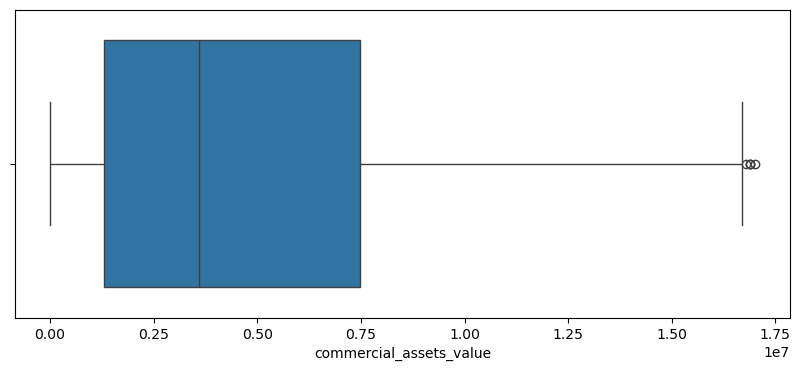

In [199]:
plt.figure(figsize=(10,4))
sns.boxplot(x="commercial_assets_value",data=dataset)
plt.show()

# visualizing all possible graph for the dataset columns

<Figure size 1000x1000 with 0 Axes>

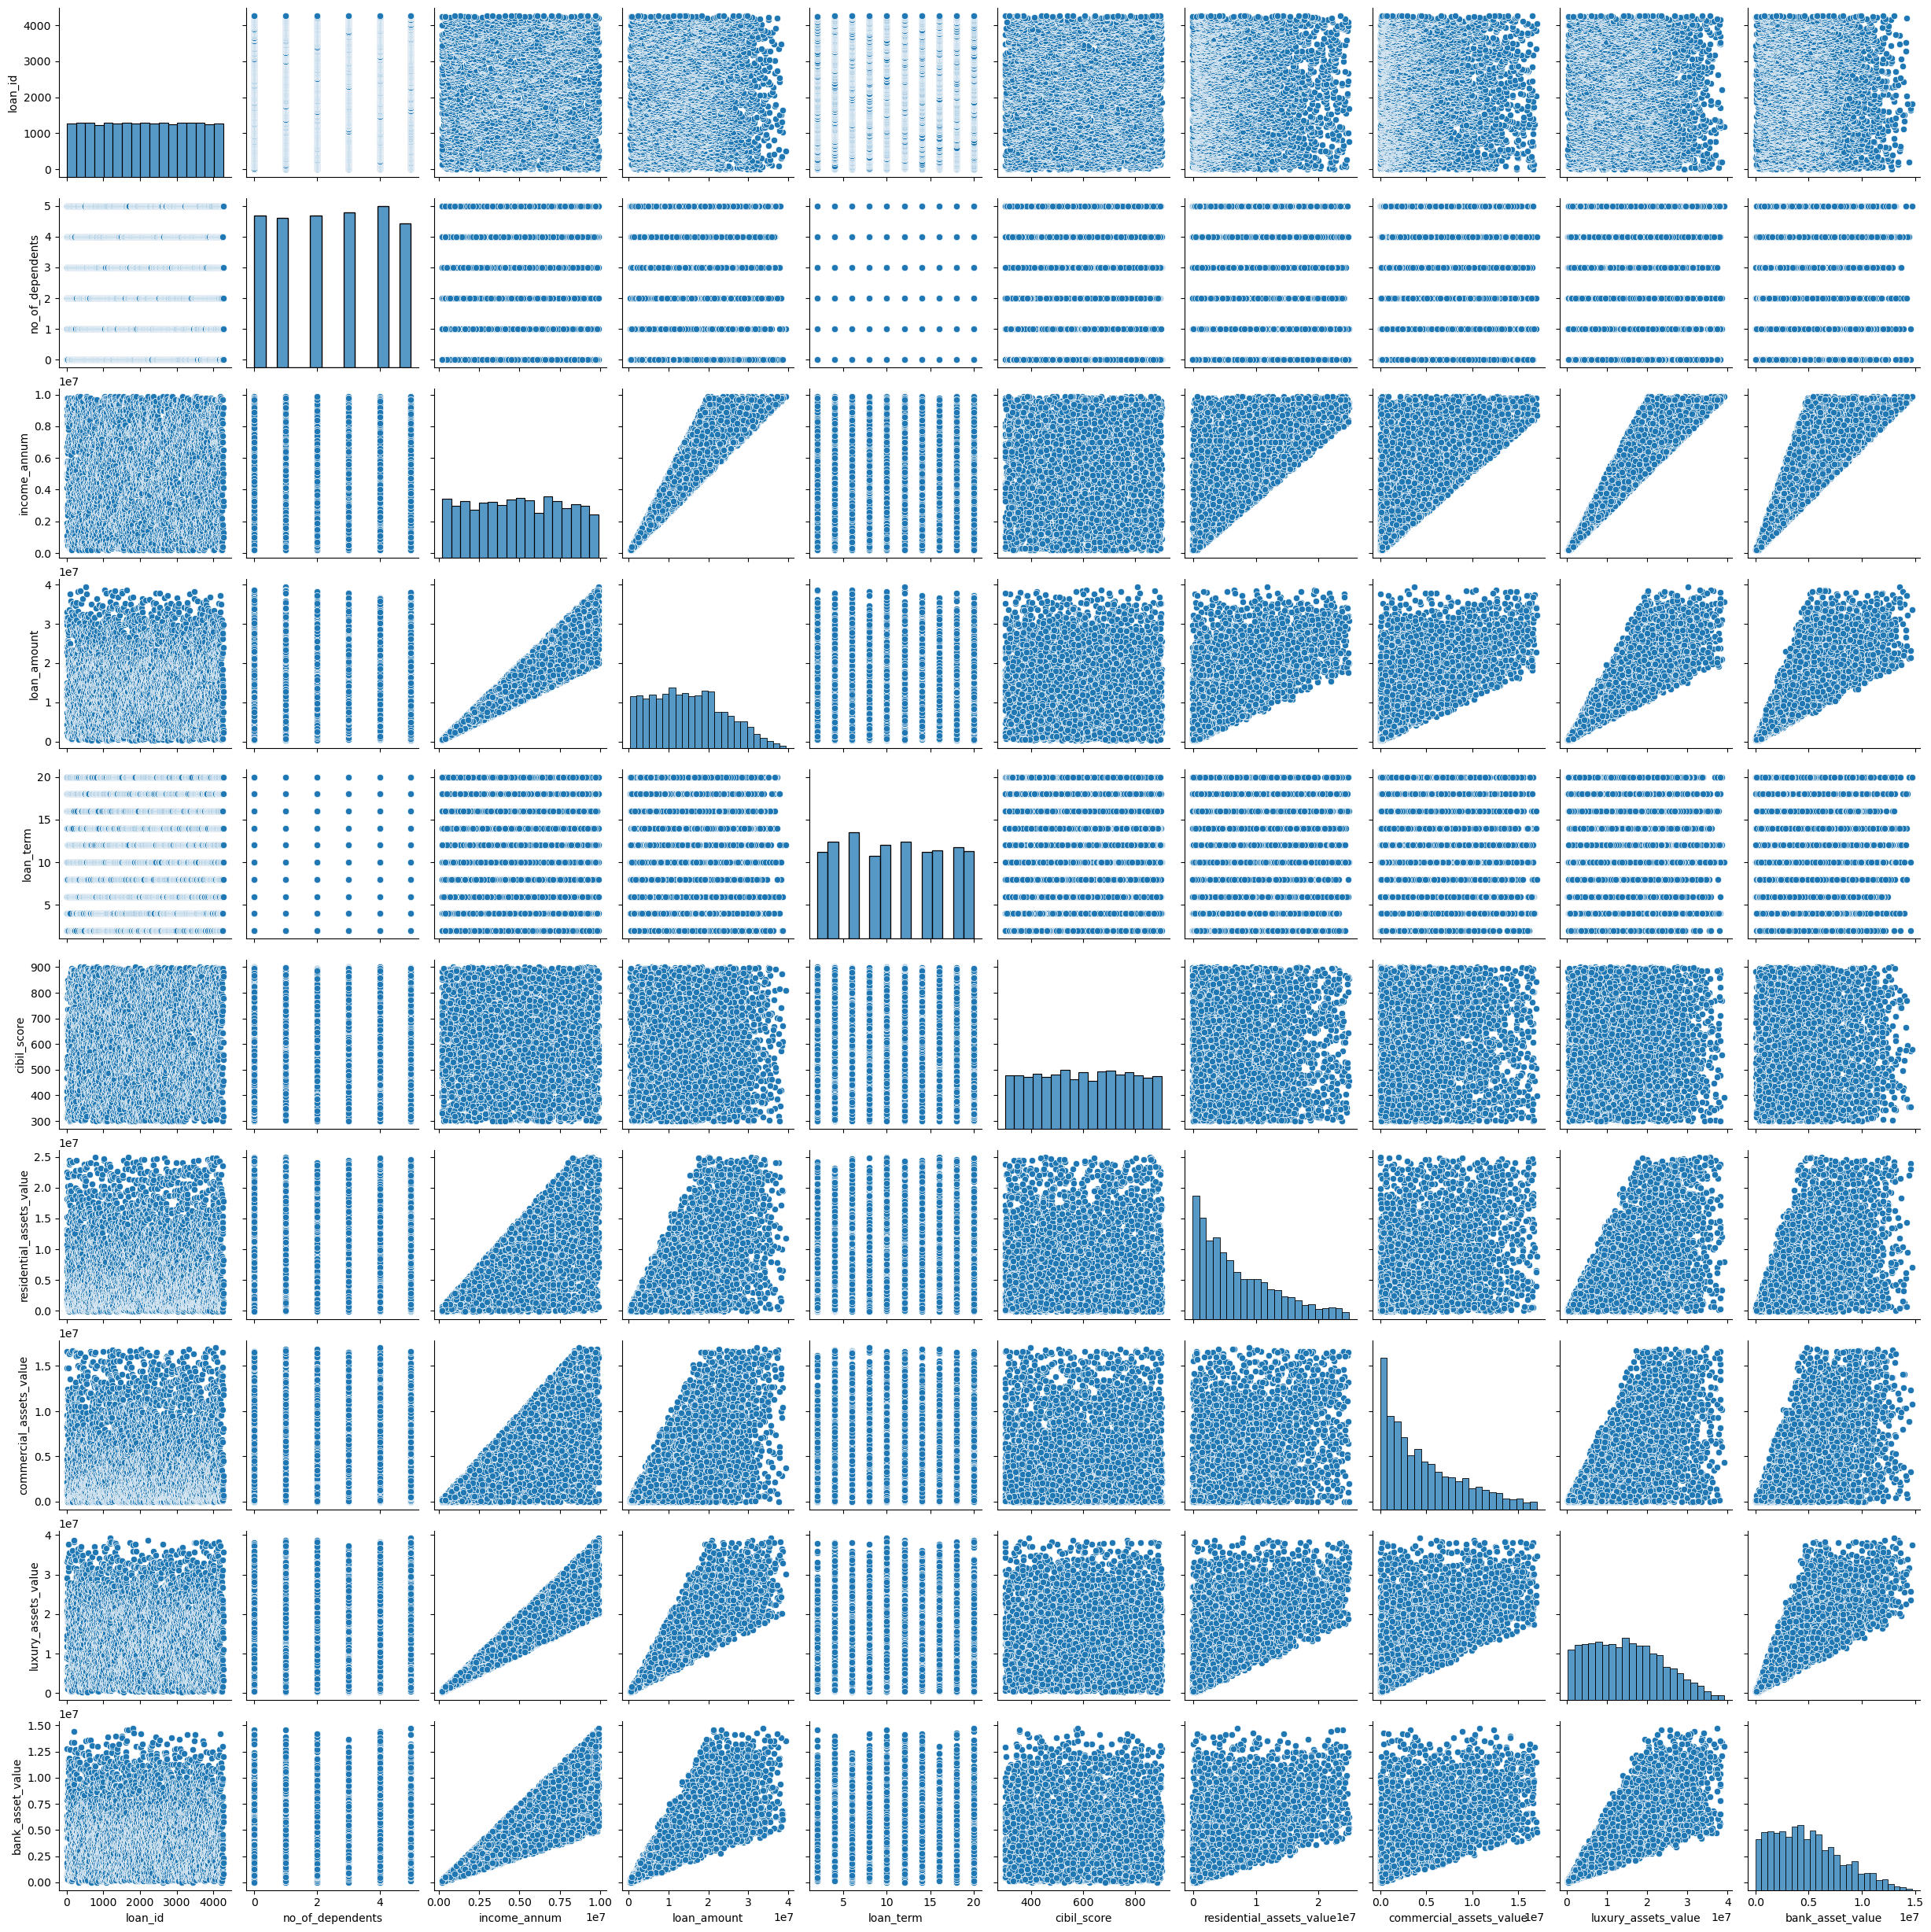

In [201]:
plt.figure(figsize=(10,10))
sns.pairplot(data=dataset)
plt.show()

# Dropping unneccessary column

In [203]:
dataset.drop(columns="loan_id",inplace=True)

In [204]:
dataset.select_dtypes(include=["object"])

education self_employed loan_status
1      Not Graduate           Yes    Rejected
2          Graduate            No    Rejected
3          Graduate            No    Rejected
4      Not Graduate           Yes    Rejected
5          Graduate           Yes    Rejected
...             ...           ...         ...
4264       Graduate           Yes    Rejected
4265   Not Graduate           Yes    Approved
4266   Not Graduate            No    Rejected
4267   Not Graduate            No    Approved
4268       Graduate            No    Approved

[4182 rows x 3 columns]

In [205]:
dataset.head(3)

no_of_dependents      education self_employed  income_annum  loan_amount  \
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   

   luxury_assets_value  bank_asset_value loan_status  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected

# checking the values counts for the objects data types

In [207]:
dataset[['education', 'self_employed', 'loan_status']].apply(pd.Series.value_counts)

education  self_employed  loan_status
Approved            NaN            NaN       2605.0
Graduate         2109.0            NaN          NaN
No                  NaN         2077.0          NaN
Not Graduate     2073.0            NaN          NaN
Rejected            NaN            NaN       1577.0
Yes                 NaN         2105.0          NaN

# Importing libraries for encoding categorical columns

In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
la=LabelEncoder()

defining la as labelencoder

In [212]:
print(dataset['education'].unique())

[' Not Graduate' ' Graduate']


education has two unique values 'Not Graduate' ad 'Graduate'

# Removing unneccessary spaces from education

In [215]:
dataset['education'] = dataset['education'].str.strip() 
dataset['education'] = dataset['education'].map({'Not Graduate': 0, 'Graduate': 1})

In [216]:
la.fit(dataset["self_employed"])

LabelEncoder()

fitting the self_employed column under labelencoder

In [218]:
dataset["self_employed"]=la.transform(dataset["self_employed"])

transforming the column under binary form

In [220]:
print(dataset['loan_status'].unique())

[' Rejected' ' Approved']


loan_status has 2 unique values 'Rejected' and 'Approved'

# Removing unneccessary space from loan_status

In [223]:
dataset['loan_status'] = dataset['loan_status'].str.strip()  
dataset['loan_status'] = dataset['loan_status'].map({'Rejected': 0, 'Approved': 1})

In [224]:
dataset.head(5)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   
4                 5          0              1       9800000     24200000   
5                 0          1              1       4800000     13500000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   
5         10          319                   6800000                  8300000   

   luxury_assets_value  bank_asset_value  loan_status  
1              8800000           3300000            0  
2             33300000          12800000            0  
3             23300000           7900000            0  
4             29400000           5000000            0  
5             13700000           5100000            0

# Checking values count after encoding

In [226]:
dataset[['education', 'self_employed', 'loan_status']].apply(pd.Series.value_counts)

education  self_employed  loan_status
1       2109           2105         2605
0       2073           2077         1577

2109 people are educated and 2073 are uneducated.
2105 people are self_employed and 2077 are not.
2605 people have got approval for loan and 1577 people have got rejected.

# Seperating Input Features and Output Feature 

In [229]:
x=dataset.iloc[:,:-1]
y=dataset["loan_status"]

x denotes the input features and y denotes the outcomes

# Importing Libraries For Feature_Selection And Prediction Model

In [232]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [233]:
dtc=DecisionTreeClassifier()

defining dtc as DecisionTreeClassifier

In [235]:
sf=SequentialFeatureSelector(dtc,k_features=10,forward=True)
sf.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(10, 10), scoring='accuracy')

getting 10 important features for the decisiontree by fitting the x and y data in the sequentialfeatureselector.

In [237]:
sf.k_feature_names_

('education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value')

In [238]:
sf.k_score_

0.9777626291208634

In [239]:
dataset.shape

(4182, 12)

In [240]:
sf1=SequentialFeatureSelector(dtc,k_features=9,forward=True)
sf1.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=(9, 9),
                          scoring='accuracy')

getting 9 important features for the decisiontree by fitting the x and y data in the sequentialfeatureselector.

In [242]:
sf1.k_feature_names_

('education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'bank_asset_value')

In [243]:
sf1.k_score_

0.9803944938919471

In [244]:
sf2=SequentialFeatureSelector(dtc,k_features=8,forward=True)
sf2.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=(8, 8),
                          scoring='accuracy')

getting 8 important features for the decisiontree by fitting the x and y data in the sequentialfeatureselector.

In [246]:
sf2.k_feature_names_

('education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'bank_asset_value')

In [247]:
sf2.k_score_

0.9811119114175142

In [248]:
sf3=SequentialFeatureSelector(dtc,k_features=11,forward=True)
sf3.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(11, 11), scoring='accuracy')

getting 11 important features for the decisiontree by fitting the x and y data in the sequentialfeatureselector.

In [250]:
sf3.k_feature_names_

('no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value')

In [251]:
sf3.k_score_

0.9770437824767196

In [252]:
sf4=SequentialFeatureSelector(dtc,k_features=7,forward=True)
sf4.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=(7, 7),
                          scoring='accuracy')

getting 7 important features for the decisiontree by fitting the x and y data in the sequentialfeatureselector.

In [254]:
sf4.k_feature_names_

('no_of_dependents',
 'education',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'luxury_assets_value')

In [255]:
sf4.k_score_

0.9782399547255235

In [256]:
sf5=SequentialFeatureSelector(dtc,k_features=6,forward=True)
sf5.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=(6, 6),
                          scoring='accuracy')

getting 6 important features for the decisiontree by fitting the x and y data in the sequentialfeatureselector.

In [258]:
sf5.k_feature_names_

('self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'luxury_assets_value')

In [259]:
sf5.k_score_

0.9791963208771358

# Reviewing dataset

In [261]:
dataset.head(3)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   

   luxury_assets_value  bank_asset_value  loan_status  
1              8800000           3300000            0  
2             33300000          12800000            0  
3             23300000           7900000            0

# Importing Libraries for Cross_Validation

In [263]:
from sklearn.model_selection import StratifiedKFold

In [264]:
from sklearn.model_selection import cross_val_score

# cross_validation

In [458]:
cross_val=cross_val_score(DecisionTreeClassifier(),x,y,cv=StratifiedKFold(n_splits=30))

In [460]:
cross_val.sort
cross_val*100

array([99.28571429, 97.85714286, 97.85714286, 97.85714286, 99.28571429,
       95.71428571, 97.14285714, 97.14285714, 97.85714286, 98.57142857,
       95.71428571, 99.28571429, 97.84172662, 97.12230216, 98.56115108,
       97.12230216, 97.84172662, 98.56115108, 97.84172662, 97.84172662,
       97.84172662, 97.84172662, 97.12230216, 97.12230216, 98.56115108,
       98.56115108, 95.68345324, 99.28057554, 98.56115108, 98.56115108])

# Dataset Splitting 

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [271]:
x_train.shape

(3345, 11)

In [272]:
x_test.shape

(837, 11)

In [273]:
y_train.shape

(3345,)

In [274]:
y_test.shape

(837,)

# Fitting Data in DecisionTree

In [276]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [277]:
dtc.score(x_train,y_train)*100,dtc.score(x_test,y_test)*100

(100.0, 97.1326164874552)

100% training score and 97.2% testing score

# Visualizing the splitting of nodes in DecisionTree

In [280]:
from sklearn.tree import plot_tree

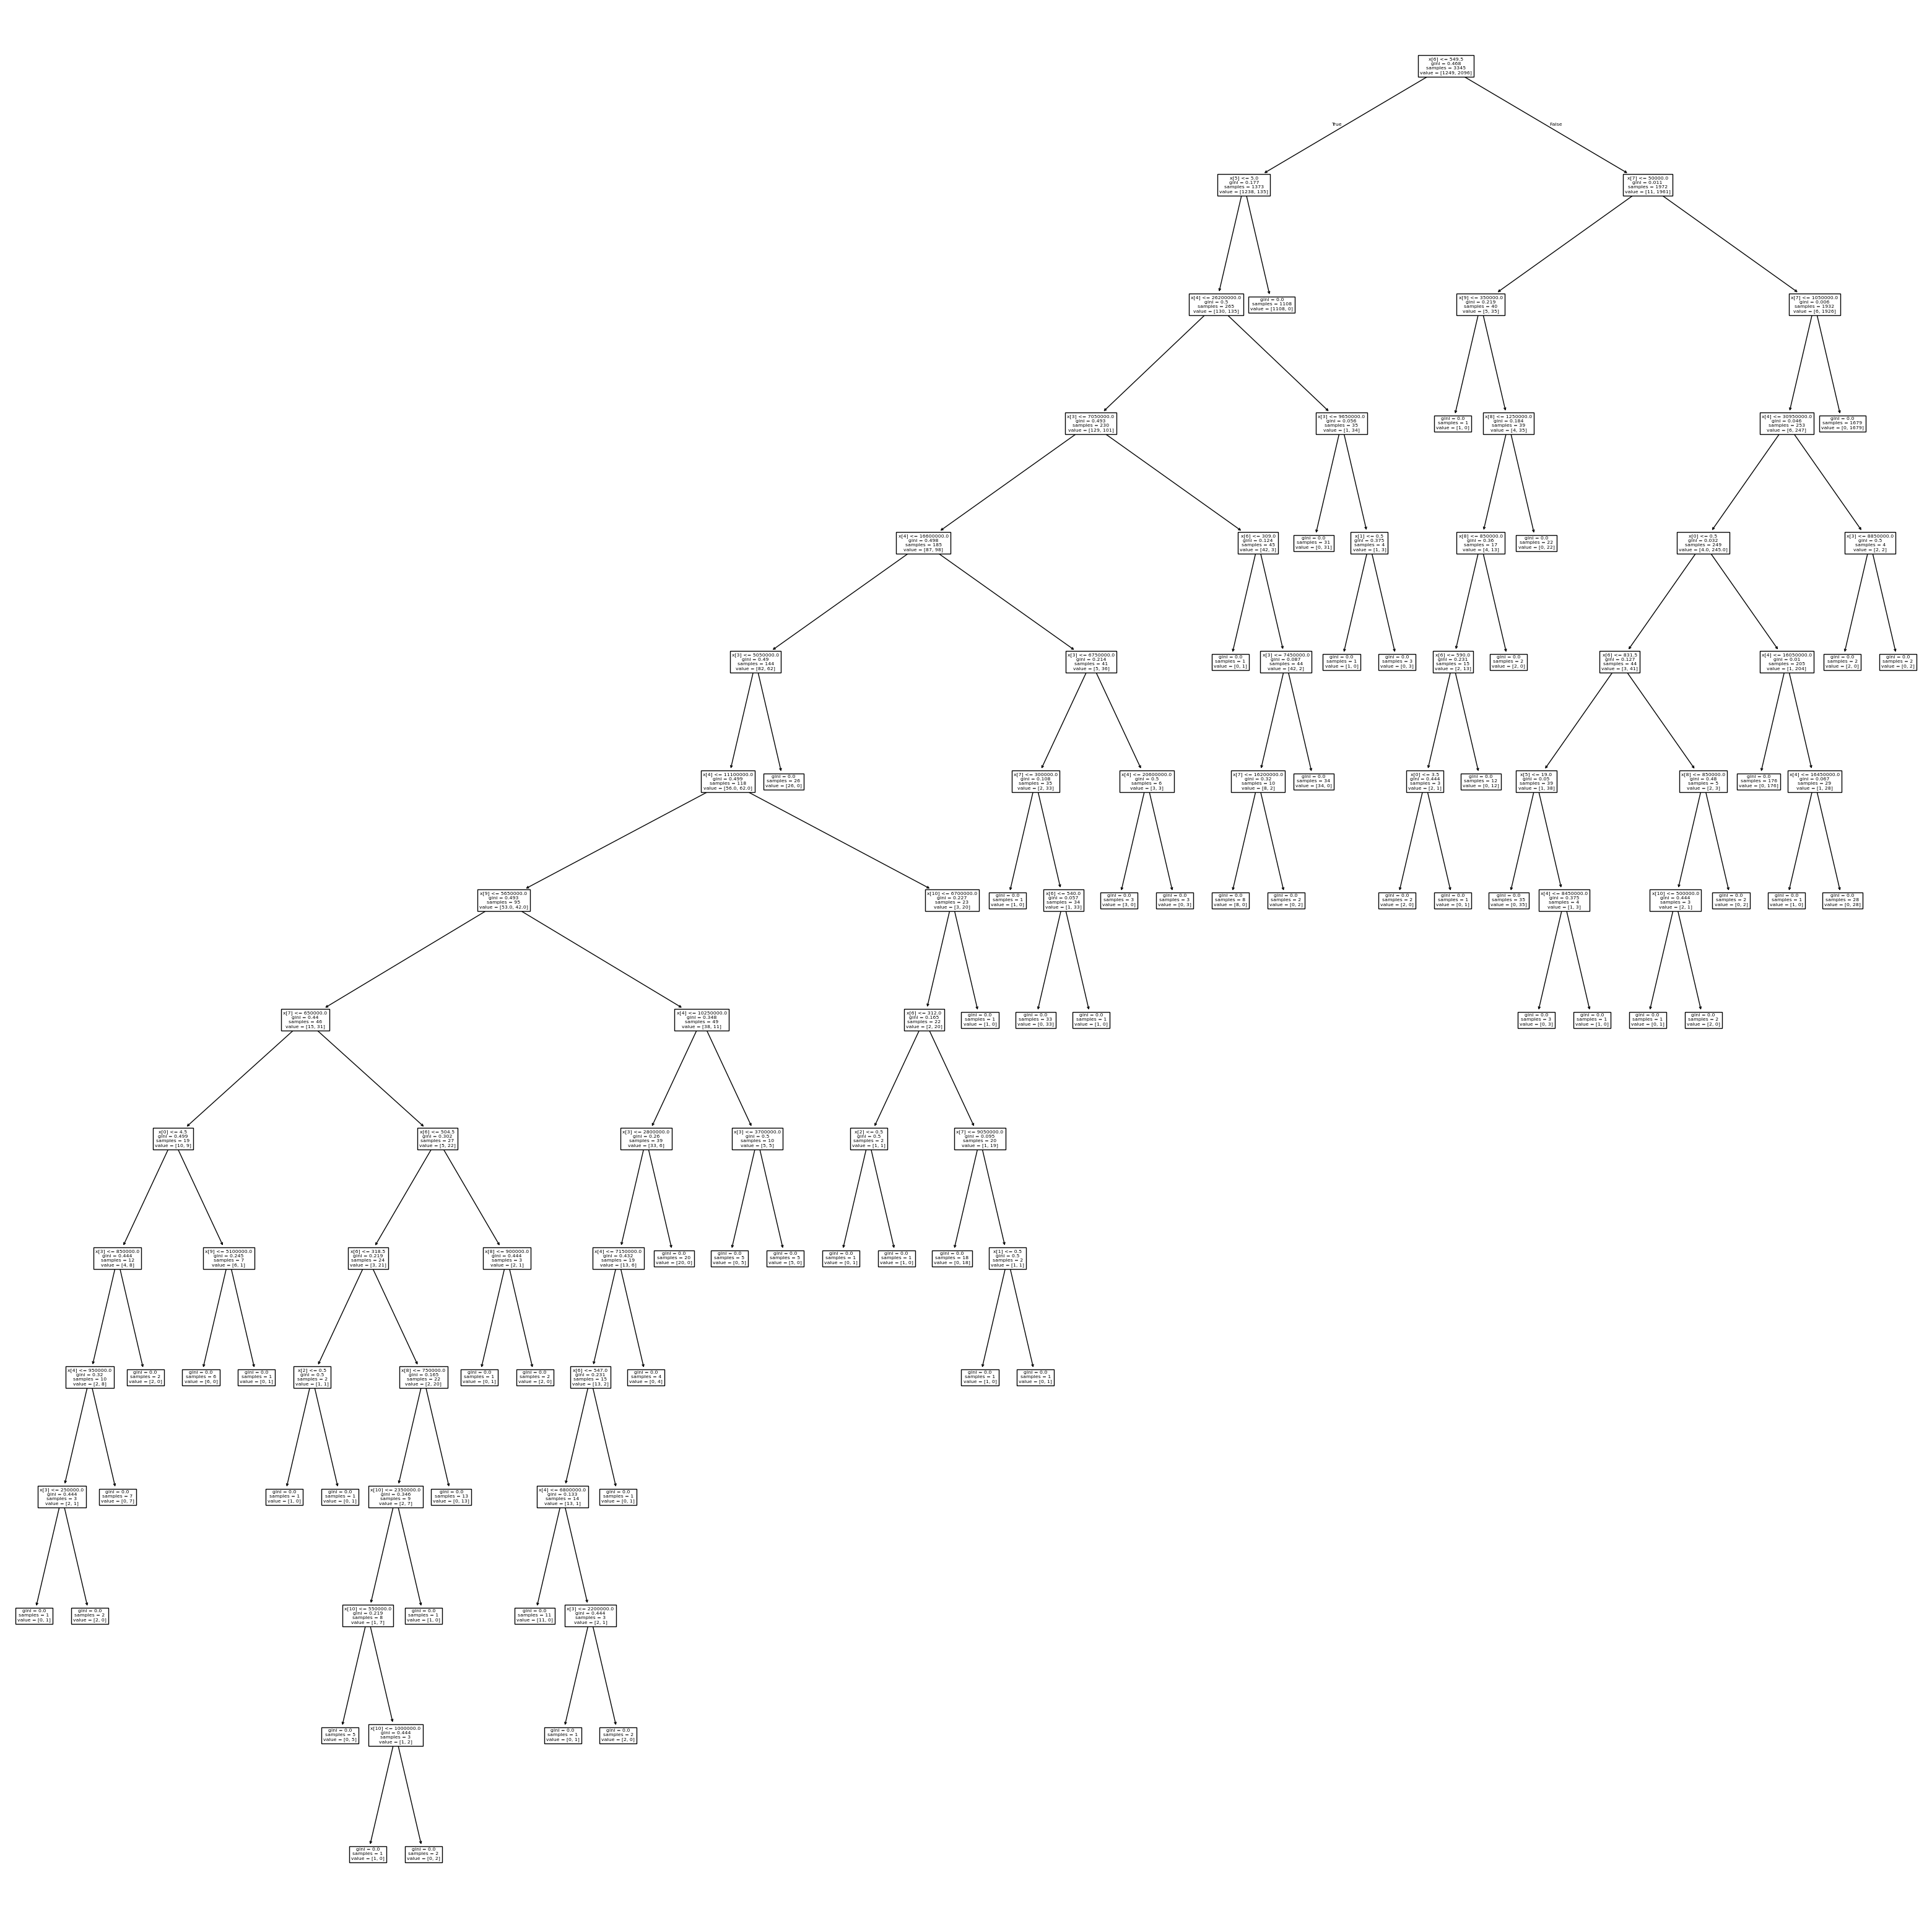

<Figure size 640x480 with 0 Axes>

In [281]:
plt.figure(figsize=(40,40))
plot_tree(dtc)
plt.show()
plt.savefig("Decision_Tree.png")

# Importing Libraries For Checking Accuracy 

In [283]:
from sklearn.metrics import confusion_matrix

In [284]:
from sklearn.metrics import precision_score,recall_score,f1_score

# Confusion_Matrix

In [286]:
cf=confusion_matrix(y_test,dtc.predict(x_test))
cf

array([[315,  13],
       [ 11, 498]])

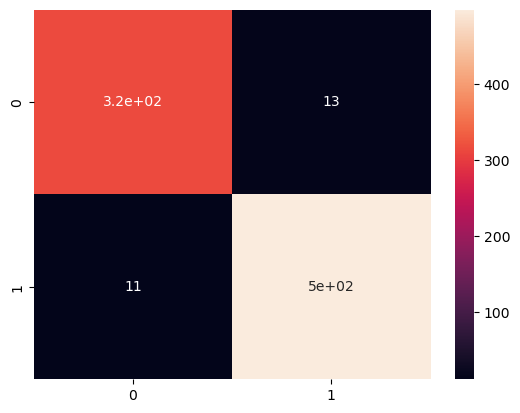

In [287]:
sns.heatmap(cf,annot=True)
plt.show()

True Positives: 498,

False Positives: 13,

False Negatives: 11,

True Negatives: 315

In [289]:
precision_score(y_test,dtc.predict(x_test))

0.974559686888454

In [290]:
recall_score(y_test,dtc.predict(x_test))

0.9783889980353635

In [291]:
f1_score(y_test,dtc.predict(x_test))

0.9764705882352941

# Hyperparameter Tuning

# Tuning Using GridSearchCV

In [294]:
from sklearn.model_selection import GridSearchCV

Defining Parameters

In [296]:
data={"criterion":['gini', 'entropy', 'log_loss'],
   "splitter":["best","random"],
   "max_depth":[i for i in range(1,30)],
   "max_features": ['sqrt', 'log2', None]}

fitting parameters into gridsearch for getting best parameters

In [298]:
gd = GridSearchCV(dtc, param_grid=data, cv=5, n_jobs=-1)
gd.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [299]:
gd.best_params_  #checking for best parameters

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': None,
 'splitter': 'best'}

In [300]:
#checking the best score for the given parameters
gd.best_score_

0.9814648729446936

# Fitting the Parameters into DecisionTree

In [471]:
Decision_tree=DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=25,max_features=None)
Decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25)

In [473]:
Decision_tree.score(x_train,y_train)*100,Decision_tree.score(x_test,y_test)*100 #checking score 

(100.0, 97.4910394265233)

# splitting of tree

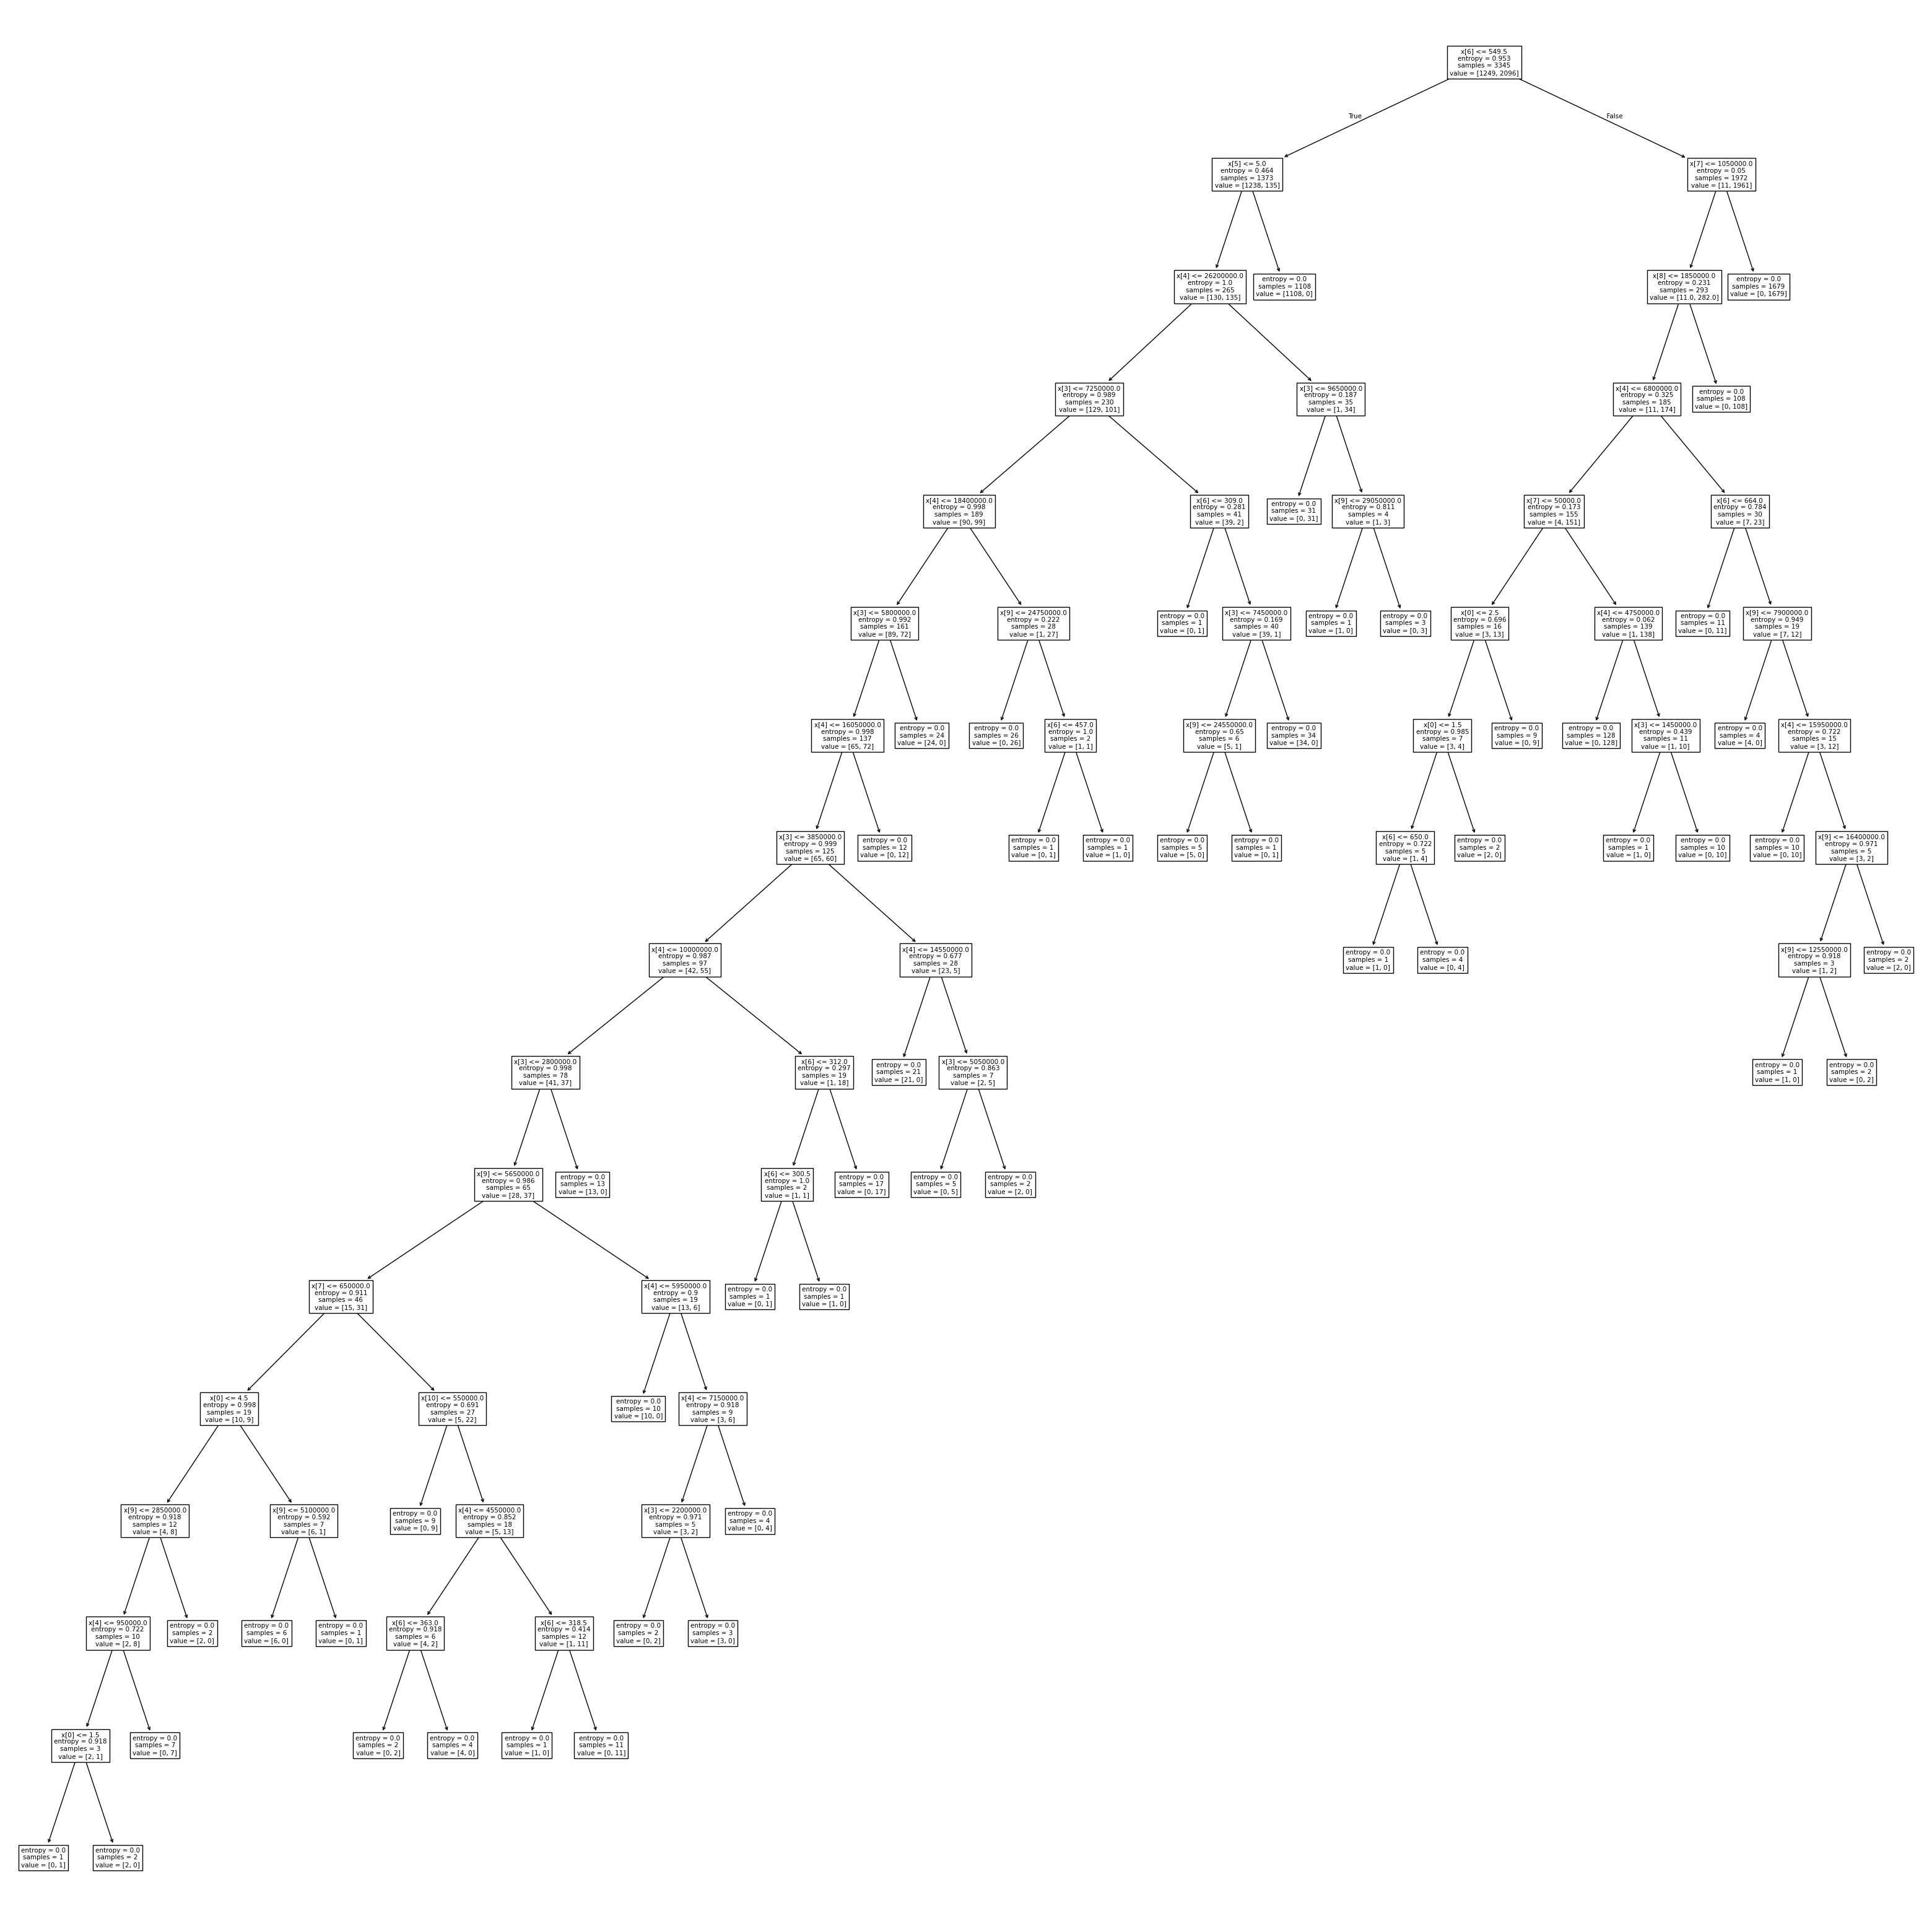

<Figure size 640x480 with 0 Axes>

In [476]:
plt.figure(figsize=(40,40))
plot_tree(Decision_tree)
plt.show()
plt.savefig("Decision_Tree_grid.png")

# confusion matrix

In [479]:
#confusion matrix
cf1=confusion_matrix(y_test,Decision_tree.predict(x_test))
cf1

array([[321,   7],
       [ 14, 495]])

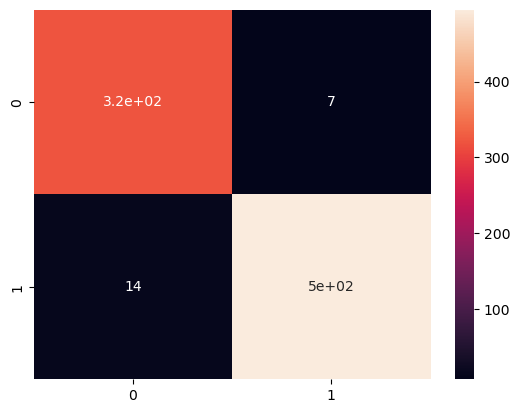

In [481]:
#visualization using heatmap
sns.heatmap(cf1,annot=True)
plt.show()

True Positives: 495,
    
False Positives: 7,
    
False Negatives: 14,
    
True Negatives: 321

In [484]:
#checking precision score
pr1=precision_score(y_test,Decision_tree.predict(x_test))
pr1

0.9860557768924303

In [486]:
#checking recall score
recall=recall_score(y_test,Decision_tree.predict(x_test))
recall

0.9724950884086444

In [488]:
#checking f1_score
f_score=f1_score(y_test,Decision_tree.predict(x_test))
f_score

0.9792284866468842

# Tuning Using RandomizedSearchCV

In [491]:
from sklearn.model_selection import RandomizedSearchCV #importing libraries

In [493]:
#defining parameters
param_dist={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[i for i in range(1,30)],
    "max_features":["sqrt","log2",None]
}

In [495]:
#fitting the parameters in randomizedsearchcv
random_search=RandomizedSearchCV(dtc,
                                 param_distributions=param_dist,
                                 n_iter=20,
                                scoring="accuracy",
                                cv=5,
                                random_state=42,
                                n_jobs=-1)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'max_features': ['sqrt', 'log2', None],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [497]:
random_search.best_params_  #checking best parameters

{'splitter': 'best',
 'max_features': None,
 'max_depth': 23,
 'criterion': 'log_loss'}

In [499]:
random_search.best_score_   #checking best score for the given parameters

0.9811659192825113

# Fitting the Data Into DecisionTree

In [518]:
decision_tree_2=DecisionTreeClassifier(criterion="log_loss",splitter="best",max_depth=23,max_features=None)
decision_tree_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=23)

In [520]:
decision_tree_2.score(x_train,y_train)*100,decision_tree_2.score(x_test,y_test)*100   #checking the score

(100.0, 97.2520908004779)

# Splitting of Nodes Under New Model Of DecisionTree

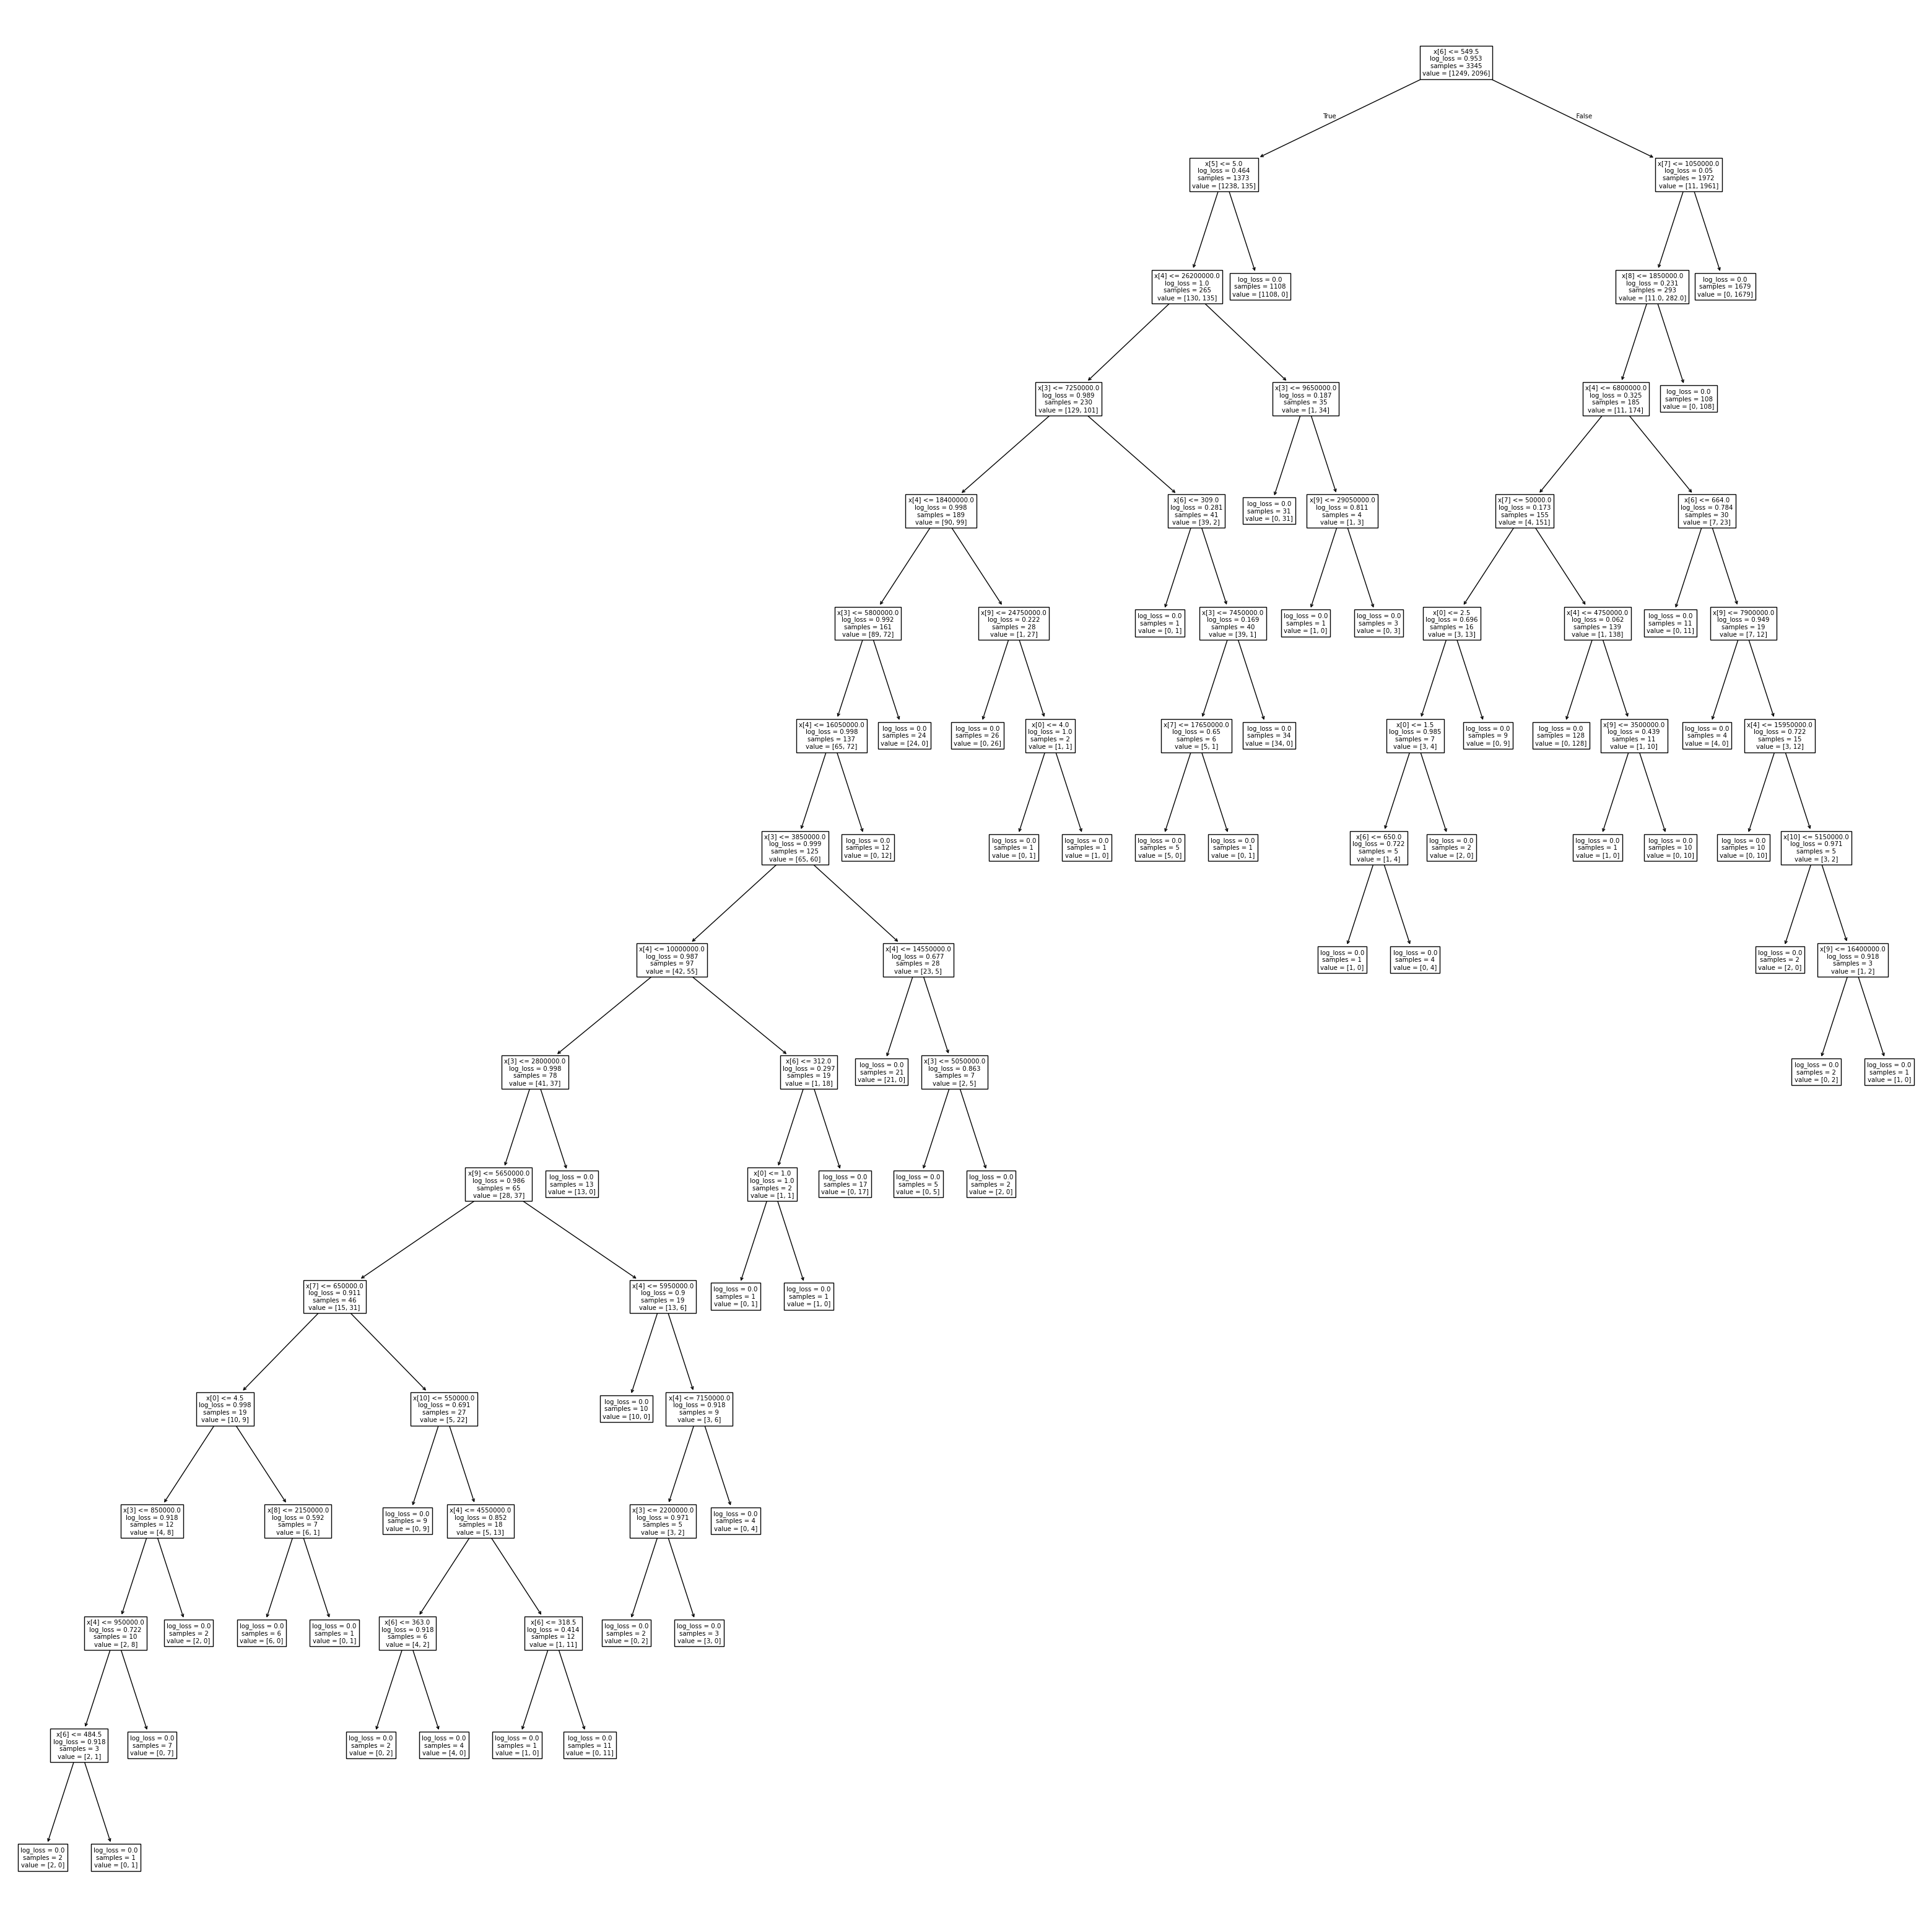

<Figure size 640x480 with 0 Axes>

In [523]:
plt.figure(figsize=(40,40))
plot_tree(decision_tree_2)
plt.show()
plt.savefig("Decision_Tree_random.png")

# Confusion Matrix

In [526]:
cf2=confusion_matrix(y_test,decision_tree_2.predict(x_test))
cf2

array([[320,   8],
       [ 15, 494]])

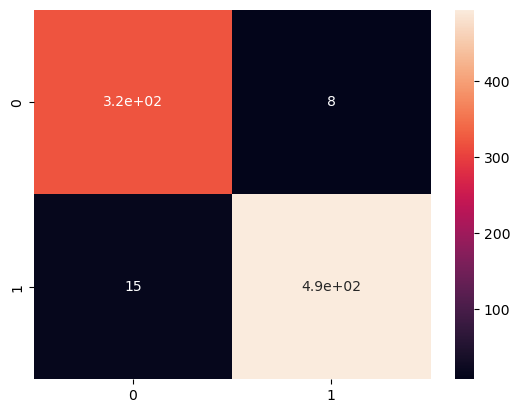

In [528]:
#visualization using heatmap
sns.heatmap(cf2,annot=True)
plt.show()

True Positives: 494,
    
False Positives: 8,
    
False Negatives: 15,
    
True Negatives: 320

In [531]:
#precision score
pr2=precision_score(y_test,decision_tree_2.predict(x_test))
pr2

0.9840637450199203

In [533]:
#recall score
recall_2=recall_score(y_test,decision_tree_2.predict(x_test))
recall_2

0.9705304518664047

In [535]:
#f1 score
f_score_2=f1_score(y_test,decision_tree_2.predict(x_test))
f_score_2

0.9772502472799208

# Testing OF Model

In [538]:
x_test[20:25]

no_of_dependents  education  self_employed  income_annum  loan_amount  \
3222                 4          0              1       5200000     18300000   
2175                 2          1              0       7000000     19800000   
1187                 3          1              1       8600000     30300000   
1199                 2          0              0        300000       600000   
1881                 4          1              1       2600000      9400000   

      loan_term  cibil_score  residential_assets_value  \
3222         10          355                    400000   
2175         10          563                   3900000   
1187         14          459                  12000000   
1199          2          383                    600000   
1881         18          481                   2700000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
3222                  3800000             10600000           3400000  
2175                  9400000             22800000           8000000  
1187                  4100000             23800000           9100000  
1199                   300000              1100000            400000  
1881                  4400000              8600000           2400000

In [540]:
y_test[20:25]

3222    0
2175    1
1187    0
1199    0
1881    0
Name: loan_status, dtype: int64

# We Finalize Decision_tree model under the 3 model of decision tree which are [dtc,Decision_tree,decision_tree_2]

Reason for selection :

Detailed Model Performance Insights:

Accuracy: 0.9860 - The model correctly predicts loan approval status for 98.60% of cases.

Precision: 0.9860 - When the model predicts loan approval, it's correct 98.60% of the time.

Recall: 0.9724 - The model correctly identifies 97.24% of all actual approved loans.

F1-score: 0.98 - Indicates a good balance between precision and recall.
    
    
Confusion Matrix:

True Positives: 495,

False Positives: 7,

False Negatives: 14,

True Negatives: 321

In [544]:
val_1=pd.DataFrame([[4,0,1,5200000,18300000,10,355,400000,3800000,10600000,3400000]],columns=x.columns)
Decision_tree.predict(val_1)

array([0])

In [546]:
val_2=pd.DataFrame([[2,1,0,7000000,19800000,10,563,3900000,9400000,22800000,8000000]],columns=x.columns)
Decision_tree.predict(val_2)

array([1])

In [338]:
val_3=pd.DataFrame([[4,1,1,2600000,9400000,18,481,2700000,4400000,8600000,2400000]],columns=x.columns)
Decision_tree.predict(val_3)

array([0])

In [548]:
val_4=pd.DataFrame([[3,1,1,8600000,30300000,14,459,12000000,4100000,23800000,9100000]],columns=x.columns)
Decision_tree.predict(val_4)

array([0])

# Conclusion

The Decision Tree model developed for loan approval prediction demonstrates strong performance and reliability:

✅ High Accuracy: With an accuracy of 98.60%, the model effectively predicts loan approvals.

✅ Balanced Performance: The model achieves a precision of 98.60% and recall of 97.24%, ensuring both accurate approvals and correct rejections.

✅ Practical Applicability: The model’s strong predictive performance makes it a useful tool for financial institutions in assessing loan eligibility efficiently.